In [2]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 06/15/23

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM


In [1]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime
from matplotlib.ticker import LogLocator
import matplotlib

print('All packages loaded!')

All packages loaded!


In [2]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell

# ---------------------------------------------------    
# --- Keff function ---
# ---------------------------------------------------
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

# ---------------------------------------------------
# --- EJD Eqns for stacked trimer ---   
# ---------------------------------------------------
def stackedTrimer(states, t):
    # These are the ode's for each species wrt to time (seconds)
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # list of ode's
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + Q - δ*x[0] 
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  -  δ*x[1]
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  - δ*x[2]
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11]  - δ*x[3]
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11]  - δ*x[4]
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11]  - δ*x[5]
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  - δ*x[6]
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7]  - δ*x[7]
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  - δ*x[8]
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9]  - δ*x[9]
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10]  - δ*x[10]
    dx_11 = + 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11]  - δ*x[11]
   
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime 

# ---------------------------------------------------
# --- Assembly Yield --- 
# ---------------------------------------------------
def calcAY24hrs(IC_1,XnTimePtsVec):
    # this function calculates the assembly yield for a time course of one species
    n=6; Xn = XnTimePtsVec;
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined)
    XT = IC_1; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn

# ---------------------------------------------------
# --- Assembly Yield for each species--- 
# ---------------------------------------------------
def calcAY24hrs_indSpecies(IC_1,solution_mat):
    # this function calculates the assembly yield for a time course of each species
    
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]
    # --- n coefficient for each species --- 
    nVec = [1,2,2,3,4,3,4,4,3,4,5,6] # hard-coded for now
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined)
    XT = IC_1; # print(XT)
    Yn_mat = []
    # --- calculate Yn ---
    for spec in range(0,12): # 12 species starting a count at 0
        # --- Xn --- 
        Xn = solution_mat[:,spec]; #print("Xn: ", Xn)
        n=nVec[spec]; Yn = n*Xn/XT;Yn_mat.append(Yn)
    
    return Yn_mat

# -----------------------------------------------------------------------
# --- Assembly Yield time courses WITH synth/deg for each main curve ---
# -----------------------------------------------------------------------

def calcAY24hrs_indSpecies_inVivo(IC_1,solution_mat):
    # this function calculates the assembly yield for a time course of each species
    
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]
    # --- n coefficient for each species --- 
    nVec = [1,2,2,3,4,3,4,4,3,4,5,6] # hard-coded for now
    # --- calculate AY at each time point for each species --- 
    tot_tps = len(solution_mat);#print("tps: ", tot_tps)
    xt_mat=[];Yn_mat=[]
    for tp in range(0,tot_tps):
        # --- calculate XT --- 
        xt_val_i = 1*x1[tp]+3*x2[tp]+2*x3[tp]+3*x4[tp]+ 4*x5[tp]+3*x6[tp]+4*x7[tp]+2*x8[tp]+3*x9[tp]+ 4*x10[tp]+5*x11[tp]+6*x12[tp]
        xt_mat.append(xt_val_i); #print("XT: ", len(xt_mat))
    # --- calculate Yn --- 
    for specI in range(0,12):
        XT = xt_mat; #print("Xt: ", XT)
        Xn = solution_mat[:,specI]; #print("Xn len: ", len(Xn))
        n = nVec[specI]; Yn = n*Xn/XT; Yn_mat.append(Yn); #print("Yn: ", Yn_mat)
    
    return Yn_mat


# ---------------------------------------------------
# --- Assembly Yield vs IC --- 
# ---------------------------------------------------

def calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts):
    # this function calculates the AY for varying values of IC in vitro
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # initialize lists to stor
    AY_list = []
    # loop to solve AY for each IC 
    for icVal in allICs:
        # for each IC calc the sols and AY 
        IC_1=icVal
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        # If the concentration is high, need different tols!
        if icVal > 10**-5:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)      
        else:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)            
        if kd1 == 10**-8:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1];
        AY_list.append(AY_valStr)
        
    return allICs, AY_list

# -----------------------------------------------------
# --- Assembly Yield with synthesis and degradation --- 
# -----------------------------------------------------
def calcAY_tc_synthDeg(tVec,solution_mat):
    # this function calculates the AY for varying values of IC in vivo
    nTpts = len(tVec)
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]

    # --- calculate Xn --- 
    # we only want AY for stacked trimer x11/x12
    Xn = x12
    # --- calculate XT and AY at each time point--- 
    XT = np.zeros(nTpts); Yn = np.zeros(nTpts);
    for timeT in range(0,nTpts):
        # for each time point calculate XT
        xt_val_i = 1*x1[timeT]+3*x2[timeT]+2*x3[timeT]+3*x4[timeT]+ 4*x5[timeT]+3*x6[timeT]+4*x7[timeT]+2*x8[timeT]+3*x9[timeT]+ 4*x10[timeT]+5*x11[timeT]+6*x12[timeT]
        XT[timeT]=xt_val_i;
        # --- calculate Yn --- 
        Yn_val = 6*Xn[timeT]/xt_val_i
        Yn[timeT] = Yn_val
    #print('XT: ', XT)
    # calc the AY at the 24hr mark - since solution_mat is calculated at 24hr mark, just send separetely the AY
    # AY24hrs = Yn[-1]
    
    XT = Q/δ; n=6; Xn = x12
    Yn = n*Xn/XT;
    
    return Yn


# --------------------------------------------------------------
# --- Assembly Yield with synthesis and degradation at 24hrs --- 
# --------------------------------------------------------------
def calcAY_synthDeg2hrs(tVec,solution_mat):
    # this function calculates the AY in vivo after 24hrs (steady state)
    nTpts = len(tVec)
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]

    # --- calculate Xn --- 
    # we only want AY for stacked trimer x11/x12
    #timeT = nTpts-1 # index of final point
    Xn = x12[-1]
    # --- calculate XT and AY at last time point (this is the 24hr mark) --- 
    xt_val_i = 1*x1[-1]+3*x2[-1]+2*x3[-1]+3*x4[-1]+ 4*x5[-1]+3*x6[-1]+4*x7[-1]+2*x8[-1]+3*x9[-1]+ 4*x10[-1]+5*x11[-1]+6*x12[-1]
    #print("XT: ", xt_val_i)
    # --- calculate Yn --- 
    Yn_val = 6*Xn/xt_val_i
    #print("YT: ", Yn_val)
    Yn24hrs = Yn_val
    
    return Yn24hrs

# ---------------------------------------------------
# --- Assembly Yield vs IC with synth/deg --- 
# ---------------------------------------------------
def calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC,nICpts):
    global Q
    # This function calculates the AY vs IC in vivo
    # --- make vector of all IC's to loop through ---
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # --- initialize vector of AY values to return --- 
    AY_vals = np.zeros(nICpts); #print(AY_vals)
    # --- loop through all ICs and calc AY ---
    for icInd in range(0,nICpts):
        IC_1 = allICs[icInd]; #print("IC val i: ",IC_1)
        Q = IC_1*δ; # print("Q val i: ", Q) # redine Q for changing IC's
        # solve the ode's for this set of parameters
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        if IC_1 > 10**-5:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)      
        else:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)            
        if kd1 == 10**-8:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        # may need another case for the gray lines !!!!
        #solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec=t;
        # --- calculate the AY at 24hrs --- 
        Yn_1 = calcAY_synthDeg2hrs(tVec,solution_1); #print("YN_i= ", Yn_1)
        # store this value 
        AY_vals[icInd]=Yn_1;
        
    return allICs, AY_vals

# ---------------------------------------------------
# --- Heatmap number formatting --- 
# ---------------------------------------------------
def precision_round(number, digits=3):
    # this function is for text output formatting purposes
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))

# ---------------------------------------------------
# --- Assembly Yield time course matrix --- 
# ---------------------------------------------------
def assemblyYield_tc_mainCurves(IC_1,allKdPairs,tPts):
    # This function returns a matrix of the time course for assembly yield of the main colored curves
    global kd1,kd2
    # --- variable initializations --- 
    states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]; tEnd = 6 # 24hrs
    t = 10**np.linspace(-3,tEnd,tPts) 
    nPairs = len(allKdPairs); allAYtc = np.zeros((nPairs,tPts))
    # loop through each pair of Kd1, kd2 combinations
    for kdI in range(0,nPairs): # for each IC 
        kdS = allKdPairs[kdI]; kd1 = kdS[0]; kd2 = kdS[1];
        # Now, integrate the ODEs and put the results in \"solution\"
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-10, atol = 1e-10)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]        
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store AY time course
        allAYtc[kdI,:]=Yn_1
    
    return allAYtc

# --------------------------------------------------
# --- Assembly Yield Time course ---
# --------------------------------------------------

def assemblyYield_tc_grayCurves(nRuns,minKdDeg,maxKdDeg,tPts,IC_1):
    # This function returns a matrix of all the gray lines for assembly yield
    global kd1,kd2
    # --- variable initializations ---
    allKd1 = 10**np.linspace(minKdDeg,maxKdDeg,nRuns); allKd2 = 10**np.linspace(minKdDeg,maxKdDeg,nRuns)
    tEnd = 6 # 24hrs
    t = 10**np.linspace(-3,tEnd,tPts) 
    allAYtcGray = np.zeros((nRuns,tPts))
    # --- loop through all cases --- 
    for runN in range(0,nRuns): # for each IC 
        if runN%100 == 0:
            print('Run: ', runN)
        kd1 = allKd1[runN]; kd2 = allKd1[runN];
        # Now, integrate the ODEs and put the results in \"solution\"
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        # change tols for some of the tc's
        if runN == 65:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]        
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store AY time course
        allAYtcGray[runN,:]=Yn_1
        
    return allAYtcGray, tVec

# --- Today --- 
now = datetime.now(); dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
today_pre = date.today()
today = today_pre.strftime("%m_%d_%y")
print("Functions ready...", dt_string)


Functions ready... 06/15/2023 16:53:27


Plot saved!
Plot saved!
Plot saved!
Plot saved!
Plot saved!


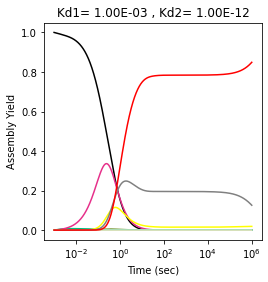

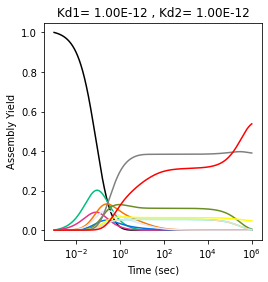

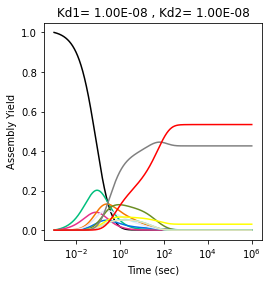

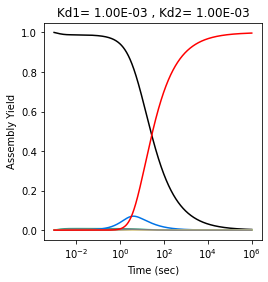

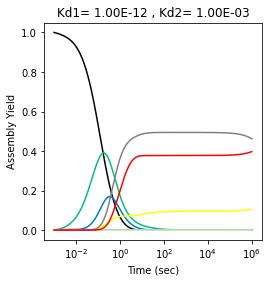

In [3]:
# -----------------------------------------------------------------------
# --- Assembly Yield time courses no synth/deg for each main curve ---
# -----------------------------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
tEnd = 6 # 24hrs
# List of parameters that will be explored 
IC_1 = 4*10**-6;tPts = 20000; 
ICFormat = format(IC_1,'.2E');
# lists of kd1 and kd2 
allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12], [10**-8, 10**-8], [10**-3, 10**-3], [10**-12, 10**-3]]
#allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12]]
colorCorr = ["red", "green","yellow","blue","purple"]
speciesColors = ["black","#00bf7d", "#e6308a","#0073e6","#f57600","lavender","olivedrab","cyan","yellow","#F5DEB3","gray","red"]
# --- time course for each main curve --- 
for kdPairInd in range(0,len(allKdPairs)):
    kdPair = allKdPairs[kdPairInd]; 
    # --- ode sln --- 
    t = 10**np.linspace(-3,tEnd,tPts); tVec =t
    kd1 = kdPair[0]; kd2 = kdPair[1];kd1_format = format(kd1,'.2E');kd2_format = format(kd2,'.2E')
    # Now, integrate the ODEs and put the results in \"solution\"
    states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
    solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
    #print(len(solution_1[:,0]))
    # --- calc AY for each species! --- 
    totAYs = calcAY24hrs_indSpecies(IC_1,solution_1) # AY matrix for each species
    
    # --- plot AY for each species ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for specI in range(0,12):
        plt.semilogx(tVec,totAYs[specI],'-', color=speciesColors[specI],linewidth=1.5)
        # --- plot specs ---
        plt.title('Kd1= '+ kd1_format + ' , Kd2= '+ kd2_format) 
        plt.xlabel('Time (sec)')
        plt.ylabel('Assembly Yield')

    # --- save final plot --- 
    ax.set_aspect(1./ax.get_data_ratio())
    plt.savefig('SR_Aytc_NoSynthDeg_'+colorCorr[kdPairInd]+'_'+today+'.eps')
    #plt.show()
    print("Plot saved!") 




--- PAIR --- 
Plot saved!
--- PAIR --- 
Plot saved!
--- PAIR --- 
Plot saved!
--- PAIR --- 
Plot saved!
--- PAIR --- 
Plot saved!


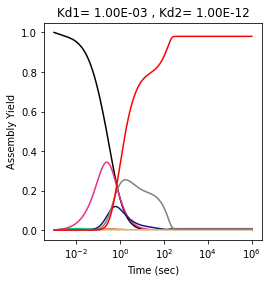

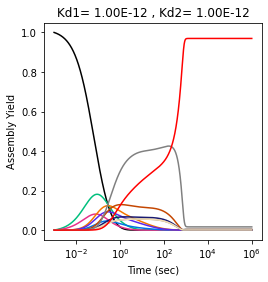

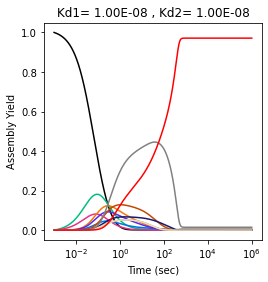

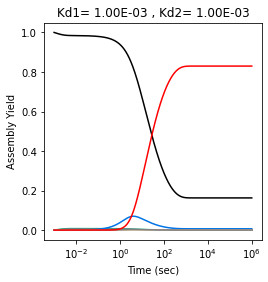

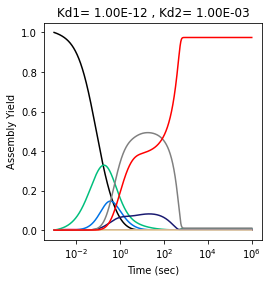

In [77]:
# -----------------------------------------------------------------------
# --- Assembly Yield time courses WITH synth/deg for each main curve ---
# -----------------------------------------------------------------------


# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_1 = 4*10**-6;
δ = 2.8*10**-4 # degradation rate parameter
Q = δ*IC_1 # synthesis rate parameter 
tEnd = 6 # 24hrs
# List of parameters that will be explored 
tPts = 20000; 
ICFormat = format(IC_1,'.2E');
# lists of kd1 and kd2 
allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12], [10**-8, 10**-8], [10**-3, 10**-3], [10**-12, 10**-3]]
#allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12]]
colorCorr = ["red", "green","yellow","blue","purple"]
speciesColors = ["black","#00bf7d", "#e6308a","#0073e6","#f57600","#5928ed","#c44601","#8B8878","#191970","#F5DEB3","gray","red"]
# --- time course for each main curve --- 
for kdPairInd in range(0,len(allKdPairs)):
    kdPair = allKdPairs[kdPairInd]; print("--- PAIR --- ")
    # --- ode sln --- 
    t = 10**np.linspace(-3,tEnd,tPts); tVec =t
    kd1 = kdPair[0]; kd2 = kdPair[1];kd1_format = format(kd1,'.2E');kd2_format = format(kd2,'.2E')
    # Now, integrate the ODEs and put the results in \"solution\"
    states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
    solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
    #print(len(solution_1[:,0]))
    # --- calc AY for each species! --- 
    totAYs = calcAY24hrs_indSpecies_inVivo(IC_1,solution_1) # AY matrix for each species
    
    # --- plot AY for each species ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for specI in range(0,12):
        plt.semilogx(tVec,totAYs[specI],'-', color=speciesColors[specI],linewidth=1.5)
        # --- plot specs ---
        plt.title('Kd1= '+ kd1_format + ' , Kd2= '+ kd2_format) 
        plt.xlabel('Time (sec)')
        plt.ylabel('Assembly Yield')

    # --- save final plot --- 
    ax.set_aspect(1./ax.get_data_ratio())
    plt.savefig('SR_Aytc_SynthDeg_'+colorCorr[kdPairInd]+'_'+today+'.eps')
    #plt.show()
    print("Plot saved!") 

Run:  0


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Plot saved!


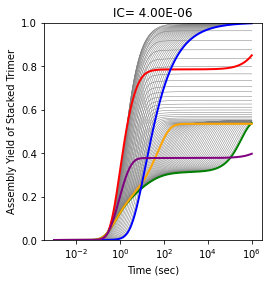

In [30]:
# ---------------------------------------------------
# --- Assembly Yield time courses no synth/deg ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter

# List of parameters that will be explored 
IC_1 = 4*10**-6;tPts = 20000; 
# lists of kd1 and kd2 
allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12], [10**-8, 10**-8], [10**-3, 10**-3], [10**-12, 10**-3]]


# --- colored curves --- 
allAYtc = assemblyYield_tc_mainCurves(IC_1,allKdPairs,tPts)

# --- gray lines ----
nRuns = 100
minKdDeg = -3; maxKdDeg = -12

allAYtcGray_tot=assemblyYield_tc_grayCurves(nRuns,minKdDeg,maxKdDeg,tPts,IC_1)
allAYtcGray=allAYtcGray_tot[0]; tVec = allAYtcGray_tot[1]

# --- PLOT all curves --- 
fig = plt.figure()
ax = fig.add_subplot(111)

for runN in range(0,nRuns):
    plt.semilogx(tVec,allAYtcGray[runN,:],'-', color = 'gray',linewidth=0.5)
    
# add the colored lines to plot
plt.semilogx(tVec,allAYtc[0,:],'-', color = 'red',linewidth=2)
plt.semilogx(tVec,allAYtc[1,:],'-', color = 'green',linewidth=2)
plt.semilogx(tVec,allAYtc[2,:],'-',color = 'orange', linewidth=2)
plt.semilogx(tVec,allAYtc[3,:],'-',color = 'blue', linewidth=2)
plt.semilogx(tVec,allAYtc[4,:],'-',color = 'purple', linewidth=2)

x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

ICFormat = format(IC_1,'.2E');

plt.title('IC= '+ ICFormat) # FIND ICFORMAT CODE!! 
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('SR_Aytc_NoSynthDeg_100runs_'+today+'.eps')
#plt.show()
print("Plot saved!")        

Working on all AY tc...
Run:  0
Plot saved!


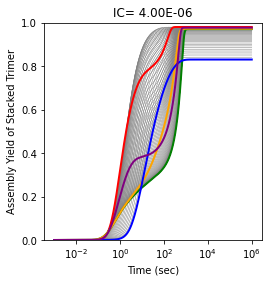

In [40]:
# ----------------------------------------------------------------
# --- Assembly Yield time courses + gray curves with synth/deg ---
# ----------------------------------------------------------------
 
print("Working on all AY tc...")
# --- PARAMETERS ---
# List of fixed parameters
numPlots = 100; #number of curves to plot
kOn = 10**6
IC_1 = 4*10**-6;
δ = 2.8*10**-4 # degradation rate parameter
Q = δ*IC_1 # synthesis rate parameter 
states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
tEnd = 6 # 24hrs
tPts = 20000; t = 10**np.linspace(-3,tEnd,tPts)
minKdDeg = -12; maxKdDeg = -3

# define all the varibles that we will be sweeping through 
allKd1 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
allKd2 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
# store all tc's in a single matrix 
allAYs = np.zeros((numPlots,tPts))
# for each run we need to get the AY tc 
for runN in range(0,numPlots):
    if runN%100 == 0:
        print('Run: ', runN)
    kd1 = allKd1[runN] # binding affinity WITHIN rings (intra)
    kd2 = allKd2[runN] # binding affinity BETWEEN rings (inter)
    solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
    tVec=t;
    # now calc AY tc
    if δ == 0: # if no synthesis and degrdation 
        xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
    else:
        Yn_1 = calcAY_tc_synthDeg(tVec,solution_1);
    # and store the AY tc
    allAYs[runN,:]=Yn_1
        
# --- colored curves --- 
# lists of kd1 and kd2 
allKdPairs =[[10**-3, 10**-12], [10**-12, 10**-12], [10**-8, 10**-8], [10**-3, 10**-3], [10**-12, 10**-3]]
nPairs = len(allKdPairs)

allAYtc_SD = np.zeros((nPairs,tPts))
for kdI in range(0,nPairs): # for each IC 
    kdS = allKdPairs[kdI]; kd1 = kdS[0]; kd2 = kdS[1];
    # Now, integrate the ODEs and put the results in \"solution\"
    states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
    solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-10, atol = 1e-10)
    tVec = t; xStkTrm_tps_1 = solution_1[:,-1]        
    # calculate AY
    #Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
    Yn_1 = calcAY_tc_synthDeg(tVec,solution_1);
    # store AY time course
    allAYtc_SD[kdI,:]=Yn_1
     
# --- plot all curves --- 
fig = plt.figure()
ax = fig.add_subplot(111)

for runN in range(0,numPlots):
    plt.semilogx(tVec,allAYs[runN,:],'-', color = 'gray',linewidth=0.5)
# add the colored lines to plot

plt.semilogx(tVec,allAYtc_SD[0,:],'-', color = 'red',linewidth=2)
plt.semilogx(tVec,allAYtc_SD[1,:],'-', color = 'green',linewidth=2)
plt.semilogx(tVec,allAYtc_SD[2,:],'-',color = 'orange', linewidth=2)
plt.semilogx(tVec,allAYtc_SD[3,:],'-',color = 'blue', linewidth=2)
plt.semilogx(tVec,allAYtc_SD[4,:],'-',color = 'purple', linewidth=2)

x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('SR_Aytc_wSynthDeg_'+today+'.eps')

print("Plot saved!")

Running for fixed IC...
Done will all pts!


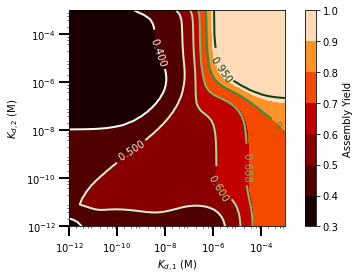

In [56]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP no synth/deg---
# ---------------------------------------------------

# calculate the AY for Kd1 vs Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_val = 4*10**-6;
δ = 0 # degradation rate parameter
Q = δ*IC_val # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
tPts = 2000; t = np.linspace(0,tEnd,tPts)

print("Running for fixed IC...")
# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
# allKd1 = [10**-12, 10**-8, 10**-6,  10**-4, 10**-3]
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2
#allKd2= [10**-12, 10**-8, 10**-6 , 10**-4, 10**-3]

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
allTcs_mat = np.zeros((nKdspts,nKdspts,tPts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]        
        # calculate AY
        Yn_1 = calcAY24hrs(IC_val,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        # print("Kd1= ", kd1, " Kd2= ", kd2, "AY= ", AY_valStr)
        kd1_kd2_AY_mat[kd2ind][kd1ind] = AY_valStr # IC on x-axis, Kd on y-axis

#print("last pt: ",kd1_kd2_AY_mat[-1][-1])       
#print("with kd1= ", kd1, " and kd2= ", kd2)
print("Done will all pts!")

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = kd1_kd2_AY_mat
# AYmatPlt = np.fliplr(kd1_kd2_AY_mat)

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('$K_{d,1}$ (M)', fontsize=10)
ax.set_ylabel('$K_{d,2}$ (M)', fontsize=10)

levels = [0.4, 0.5,0.6, 0.688, 0.8, 0.95]

CS = ax.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2,
                extent =(-1, 1, -1, 1))

ax.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 10)

# --- save plot --- 
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_n50_contours_'+today+'.eps')

Working on AY vs IC...
Done with AY vs IC pts


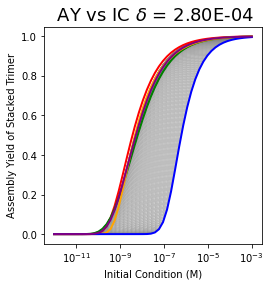

In [84]:
# ----------------------------------------------------
# --- Assembly Yield w Synth/Deg at 24hrs AY vs IC ---
# ----------------------------------------------------

# calculate AY vs IC 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")

# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
kd1 = 10**-3 ; kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2; 
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

# --- gray lines ---- 
minKdDeg = -12; maxKdDeg = -3
numPlots= 100
allAYsIC=np.zeros((numPlots,nICpts))
# define all the varibles that we will be sweeping through 
allKd1 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
allKd2 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
# store all tc's in a single matrix 
allAYsIC_sd = np.zeros((numPlots,nICpts))
# for each run we need to get the AY tc 
for runN in range(0,numPlots):
    kd1 = allKd1[runN] # binding affinity WITHIN rings (intra)
    kd2 = allKd2[runN] # binding affinity BETWEEN rings (inter)
    # now calc AY tc
    allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
    allICs_g = allAY_ICs[0]; AYvsIC_g=allAY_ICs[1]
    # and store the AY tc
    allAYsIC_sd[runN,:]=AYvsIC_g

print("Done with AY vs IC pts")

# --- Now plot curve ---
delta_val_format = format(δ_main,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig = plt.figure()
ax = fig.add_subplot(111)

for runN in range(0,numPlots):
    plt.semilogx(allICs_1,allAYsIC_sd[runN,:],'-', color = 'gray',linewidth=0.5)

fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')

#plt.axis((x1,x2,0,1))
plt.title( " AY vs IC $\delta$ = " +delta_val_format, fontsize=18)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,  "Kd1="+kd1_format_4+", kd2=" +kd2_format_4, "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AYvsIC_sd_'+today+'.eps')
 



In [78]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP w synth/deg---
# ---------------------------------------------------

# calculate the AY for Kd1 vs Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main # synthesis parameter
# IC_val = 4*10**-6
IC_val = 4*10**-8
Q = IC_val*δ
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed IC...")
# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY_synthDeg2hrs(tVec,solution_1);
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        #AY_valStr = Yn_1[-1]; 
        AY_valStr = Yn_1;
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        #kd1_kd2_AY_mat[kd1ind][kd2ind] = AY_valStr # IC on x-axis, Kd on y-axis
        kd1_kd2_AY_mat[kd2ind][kd1ind] = AY_valStr
        
print("Done will all pts!")
#print(kd1_kd2_AY_mat)

# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP w contours ---
# ---------------------------------------------------

AYmatPlt=kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat) 

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('$K_{d,1}$ (M)', fontsize=10)
ax.set_ylabel('$K_{d,2}$ (M)', fontsize=10)

levels = [0.1, 0.3, 0.5, 0.7, 0.75, 0.8]

CS = ax.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2,
                extent =(-1, 1, -1, 1))

ax.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 10)

# --- save plot --- 
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_synthDeg_contours_'+today+'.eps')

Running for fixed IC...
Done will all pts!


In [ ]:
# ---------------------------------------------------
# --- AY vs IC no synth/deg---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_val = 4*10**-6;
δ = 0 # degradation rate parameter
Q = δ*IC_val # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
tPts = 2000; t = np.linspace(0,tEnd,tPts)

# make vector of all IC to consider
nICpts=50; minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")

# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
print("Red")
kd1 = 10**-3 ; kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2; 
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
print("Green")
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
print("Orange")
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
print("Blue")
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
print("Purple")
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

# --- gray lines ---- 
minKdDeg = -12; maxKdDeg = -3
numPlots= 100
allAYsIC=np.zeros((numPlots,nICpts))
# define all the varibles that we will be sweeping through 
allKd1 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
allKd2 = 10**np.linspace(minKdDeg,maxKdDeg,numPlots)
# store all tc's in a single matrix 
allAYsIC_sd = np.zeros((numPlots,nICpts))
# for each run we need to get the AY tc 
for runN in range(0,numPlots):
    if runN%10 == 0:
        print("Run: ", runN)
    kd1 = allKd1[runN] # binding affinity WITHIN rings (intra)
    kd2 = allKd2[runN] # binding affinity BETWEEN rings (inter)
    # now calc AY tc
    allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
    allICs_g = allAY_ICs[0]; AYvsIC_g=allAY_ICs[1]
    # and store the AY tc
    allAYsIC_sd[runN,:]=AYvsIC_g

print("Done with AY vs IC pts")

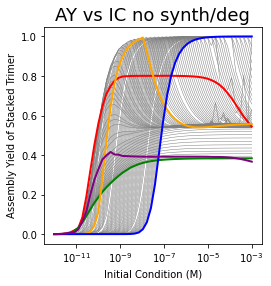

In [212]:
# --- Now plot curve ---
#delta_val_format = format(δ_main,‘.2E’);
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')
fig = plt.figure()
ax = fig.add_subplot(111)
noAddBin=[];
for runN in range(0,numPlots):
    # take off that weird one
    #if runN == 14 or runN == 17 or runN == 21 or runN == 28: #or runN == 16:
    if runN == 14 or runN == 17 or runN == 21 or runN == 28 or runN == 55 or runN == 31 or runN == 37 or runN == 45 or runN == 87:#or runN == 16:
        noAddBin.append(runN); #print('not these!')
    else:
        plt.semilogx(allICs_1,allAYsIC_sd[runN,:],'-', color = 'gray',linewidth=0.5)
        
fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')
#plt.axis((x1,x2,0,1))
plt.title( 'AY vs IC no synth/deg', fontsize=18)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.legend([“Kd1=“+kd1_format_1+“, kd2=” +kd2_format_1, “Kd1=“+kd1_format_2+“, kd2=” +kd2_format_2, “Kd1=“+kd1_format_3+“, kd2=” +kd2_format_3,  “Kd1=“+kd1_format_4+“, kd2=” +kd2_format_4, “Kd1=“+kd1_format_5+“, kd2=” +kd2_format_5],loc=‘center left’, bbox_to_anchor=(1, 0.5))
#plt.show()
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AYvsIC_sd_'+today+'.eps')
 

plot saved!


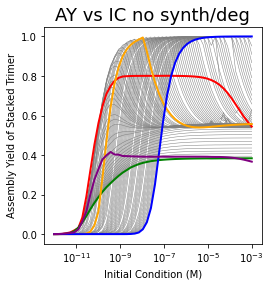

In [263]:
# --- Now plot curve ---
#delta_val_format = format(δ_main,‘.2E’);
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')
fig = plt.figure()
ax = fig.add_subplot(111)
noAddBin=[];
for runN in range(0,numPlots):
    # take off that weird one
    #if runN == 14 or runN == 17 or runN == 21 or runN == 28: #or runN == 16:
    if runN == 14 or runN == 17 or runN == 21 or runN == 28 or runN == 55 or runN == 31 or runN == 35 or runN == 37 or runN == 42 or runN == 45 or runN == 72 or runN == 79 or runN == 87:#or runN == 16:
        noAddBin.append(runN); #print('not these!')
    else:
        plt.semilogx(allICs_1,allAYsIC_sd[runN,:],'-', color = 'gray',linewidth=0.5)
        
fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')
#plt.axis((x1,x2,0,1))
plt.title( 'AY vs IC no synth/deg', fontsize=18)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.legend([“Kd1=“+kd1_format_1+“, kd2=” +kd2_format_1, “Kd1=“+kd1_format_2+“, kd2=” +kd2_format_2, “Kd1=“+kd1_format_3+“, kd2=” +kd2_format_3,  “Kd1=“+kd1_format_4+“, kd2=” +kd2_format_4, “Kd1=“+kd1_format_5+“, kd2=” +kd2_format_5],loc=‘center left’, bbox_to_anchor=(1, 0.5))
#plt.show()
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AYvsIC_sd_'+today+'.eps')
print("plot saved!")